# Logistic Regression 

## import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## load training data

In [2]:
fname_data = 'assignment_08_data.csv'

data = np.genfromtxt(fname_data, delimiter=',')
num_data = data.shape[0]

point_x = np.zeros(num_data)
point_y = np.zeros(num_data)
label   = np.zeros(num_data)

for i in range(num_data):

    point_x[i]  = data[i,0]
    point_y[i]  = data[i,1]
    label[i]    = data[i,2]


## define linear regression function with inputs $\theta = (\theta_0, \theta_1, \theta_2)$ and ${\rm point} = (1, x, y)$

In [3]:
def linear_regression(*args):
    x = args[0]
    y = args[1]
    label = args[2]
    theta = args[3]
    
    p = np.zeros((x.shape[0],3))
    for i in range(0,x.shape[0]):
        p[i] = [1, x[i], y[i]]
     
    value = theta@p.T
    return value


## define sigmoid function with input $x$

In [4]:
def sigmoid(*args):
    x = args[0]
    z = 1 / (1 + np.exp(-x))
    return z

## define loss function for the logistic regression

In [6]:
def logistic_regression(*args):
    value = linear_regression(*args)
    sig = np.zeros(value.shape[0])
    
    for i in range(value.shape[0]):
        sig[i] = sigmoid(value[i])
    
    return sig

def compute_loss(*args):
    x = args[0]
    y = args[1]
    label = args[2]
    theta = args[3]
    
    logistic = logistic_regression(*args)
    loss = 0
    
    for i in range(x.shape[0]):
        r = (-label[i]*np.log(logistic[i]) - (1-label[i])*np.log(1-logistic[i]))
        loss = loss + r 
    
    loss = (1/x.shape[0])*loss
    return loss

## define gradient vector for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [7]:
def compute_gradient(*args):
    x = args[0]
    y = args[1]
    label = args[2]
    theta = args[3]
    
    gradient_0 = 0
    gradient_1 = 0
    gradient_2 = 0
    
    r = logistic_regression(*args)
    
    for i in range(x.shape[0]):
        gradient_0 = gradient_0 + (r[i]-label[i])*1
        gradient_1 = gradient_1 + (r[i]-label[i])*x[i]
        gradient_2 = gradient_2 + (r[i]-label[i])*y[i]               
    
    gradient_0 = (1/x.shape[0])*gradient_0
    gradient_1 = (1/x.shape[0])*gradient_1
    gradient_2 = (1/x.shape[0])*gradient_2
    
    gradient = np.array((gradient_0, gradient_1, gradient_2))
    return gradient


## gradient descent for the model parameters $\theta = (\theta_0, \theta_1, \theta_2)$

In [8]:
num_iteration   = 5000  # USE THIS VALUE for the number of gradient descent iterations 
learning_rate   = 0.001 # USE THIS VALUE for the learning rate

theta           = np.array((0, 0, 0))   # USE THIS VALUE for the initial condition of the model parameters
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

## iterations for the gradient descent

In [9]:
for i in range(num_iteration):

    theta = theta - learning_rate*compute_gradient(point_x, point_y, label, theta)
    loss = compute_loss(point_x, point_y, label, theta)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss

    print("iteration = %4d, loss = %5.5f" % (i, loss))
    print(theta)

iteration =    0, loss = 0.66813
[ 0.          0.00353072 -0.00360356]
iteration =    1, loss = 0.64476
[ 1.15663905e-07  6.94344738e-03 -7.08429770e-03]
iteration =    2, loss = 0.62295
[ 3.32816218e-07  1.02424299e-02 -1.04468031e-02]
iteration =    3, loss = 0.60256
[ 6.33118220e-07  1.34320307e-02 -1.36958331e-02]
iteration =    4, loss = 0.58350
[ 9.95483105e-07  1.65166539e-02 -1.68362256e-02]
iteration =    5, loss = 0.56567
[ 1.39729447e-06  1.95006934e-02 -1.98728268e-02]
iteration =    6, loss = 0.54897
[ 1.81541115e-06  2.23884897e-02 -2.28104323e-02]
iteration =    7, loss = 0.53332
[ 2.22696136e-06  2.51842943e-02 -2.56537395e-02]
iteration =    8, loss = 0.51864
[ 2.60994210e-06  2.78922433e-02 -2.84073117e-02]
iteration =    9, loss = 0.50485
[ 2.94364768e-06  3.05163373e-02 -3.10755517e-02]
iteration =   10, loss = 0.49188
[ 3.20895421e-06  3.30604273e-02 -3.36626839e-02]
iteration =   11, loss = 0.47967
[ 3.38848707e-06  3.55282061e-02 -3.61727427e-02]
iteration =   12

iteration =  112, loss = 0.19350
[-0.00055454  0.14228236 -0.15080195]
iteration =  113, loss = 0.19283
[-0.00056275  0.14281226 -0.15142372]
iteration =  114, loss = 0.19218
[-0.00057097  0.14333795 -0.1520412 ]
iteration =  115, loss = 0.19153
[-0.00057921  0.14385951 -0.15265445]
iteration =  116, loss = 0.19090
[-0.00058746  0.14437699 -0.15326353]
iteration =  117, loss = 0.19027
[-0.00059573  0.14489046 -0.1538685 ]
iteration =  118, loss = 0.18965
[-0.000604    0.14539998 -0.15446942]
iteration =  119, loss = 0.18904
[-0.00061229  0.14590561 -0.15506634]
iteration =  120, loss = 0.18844
[-0.00062059  0.14640741 -0.15565932]
iteration =  121, loss = 0.18785
[-0.00062889  0.14690544 -0.15624841]
iteration =  122, loss = 0.18726
[-0.00063721  0.14739975 -0.15683367]
iteration =  123, loss = 0.18668
[-0.00064554  0.1478904  -0.15741514]
iteration =  124, loss = 0.18611
[-0.00065388  0.14837744 -0.15799289]
iteration =  125, loss = 0.18555
[-0.00066223  0.14886093 -0.15856696]
iterat

iteration =  239, loss = 0.14938
[-0.00162263  0.18887372 -0.20781436]
iteration =  240, loss = 0.14920
[-0.00163091  0.18913698 -0.20814863]
iteration =  241, loss = 0.14902
[-0.00163917  0.18939921 -0.2084817 ]
iteration =  242, loss = 0.14884
[-0.00164744  0.18966041 -0.20881359]
iteration =  243, loss = 0.14866
[-0.0016557   0.18992059 -0.20914429]
iteration =  244, loss = 0.14849
[-0.00166395  0.19017976 -0.20947381]
iteration =  245, loss = 0.14831
[-0.0016722   0.19043793 -0.20980217]
iteration =  246, loss = 0.14814
[-0.00168045  0.19069511 -0.21012938]
iteration =  247, loss = 0.14797
[-0.00168869  0.19095129 -0.21045544]
iteration =  248, loss = 0.14780
[-0.00169693  0.1912065  -0.21078036]
iteration =  249, loss = 0.14763
[-0.00170516  0.19146074 -0.21110414]
iteration =  250, loss = 0.14746
[-0.00171339  0.19171402 -0.2114268 ]
iteration =  251, loss = 0.14729
[-0.00172161  0.19196633 -0.21174835]
iteration =  252, loss = 0.14713
[-0.00172983  0.1922177  -0.21206878]
iterat

iteration =  356, loss = 0.13460
[-0.0025591   0.21424648 -0.24049823]
iteration =  357, loss = 0.13451
[-0.00256684  0.21442668 -0.24073325]
iteration =  358, loss = 0.13442
[-0.00257457  0.21460639 -0.24096768]
iteration =  359, loss = 0.13434
[-0.00258229  0.21478562 -0.24120151]
iteration =  360, loss = 0.13425
[-0.00259002  0.21496437 -0.24143475]
iteration =  361, loss = 0.13417
[-0.00259773  0.21514265 -0.2416674 ]
iteration =  362, loss = 0.13408
[-0.00260545  0.21532044 -0.24189946]
iteration =  363, loss = 0.13400
[-0.00261315  0.21549777 -0.24213094]
iteration =  364, loss = 0.13391
[-0.00262086  0.21567462 -0.24236183]
iteration =  365, loss = 0.13383
[-0.00262856  0.21585101 -0.24259215]
iteration =  366, loss = 0.13374
[-0.00263625  0.21602693 -0.24282189]
iteration =  367, loss = 0.13366
[-0.00264394  0.21620239 -0.24305106]
iteration =  368, loss = 0.13358
[-0.00265163  0.21637739 -0.24327966]
iteration =  369, loss = 0.13349
[-0.00265931  0.21655193 -0.24350769]
iterat

iteration =  474, loss = 0.12668
[-0.00344391  0.23271925 -0.26474551]
iteration =  475, loss = 0.12663
[-0.00345119  0.23285572 -0.26492563]
iteration =  476, loss = 0.12658
[-0.00345847  0.23299192 -0.26510538]
iteration =  477, loss = 0.12653
[-0.00346574  0.23312783 -0.26528478]
iteration =  478, loss = 0.12648
[-0.003473    0.23326346 -0.26546382]
iteration =  479, loss = 0.12643
[-0.00348027  0.23339881 -0.2656425 ]
iteration =  480, loss = 0.12638
[-0.00348753  0.23353388 -0.26582083]
iteration =  481, loss = 0.12633
[-0.00349479  0.23366868 -0.2659988 ]
iteration =  482, loss = 0.12628
[-0.00350204  0.2338032  -0.26617642]
iteration =  483, loss = 0.12623
[-0.00350929  0.23393745 -0.26635369]
iteration =  484, loss = 0.12618
[-0.00351654  0.23407143 -0.26653061]
iteration =  485, loss = 0.12613
[-0.00352378  0.23420513 -0.26670719]
iteration =  486, loss = 0.12608
[-0.00353102  0.23433856 -0.26688341]
iteration =  487, loss = 0.12603
[-0.00353826  0.23447172 -0.26705929]
iterat

iteration =  598, loss = 0.12162
[-0.00432272  0.24778378 -0.28468856]
iteration =  599, loss = 0.12159
[-0.00432963  0.2478921  -0.28483234]
iteration =  600, loss = 0.12155
[-0.00433654  0.24800025 -0.28497588]
iteration =  601, loss = 0.12152
[-0.00434344  0.24810821 -0.28511918]
iteration =  602, loss = 0.12149
[-0.00435035  0.24821599 -0.28526224]
iteration =  603, loss = 0.12146
[-0.00435725  0.24832359 -0.28540508]
iteration =  604, loss = 0.12143
[-0.00436414  0.24843101 -0.28554767]
iteration =  605, loss = 0.12139
[-0.00437104  0.24853825 -0.28569003]
iteration =  606, loss = 0.12136
[-0.00437793  0.24864531 -0.28583216]
iteration =  607, loss = 0.12133
[-0.00438482  0.2487522  -0.28597406]
iteration =  608, loss = 0.12130
[-0.00439171  0.2488589  -0.28611572]
iteration =  609, loss = 0.12127
[-0.00439859  0.24896543 -0.28625715]
iteration =  610, loss = 0.12124
[-0.00440547  0.24907178 -0.28639835]
iteration =  611, loss = 0.12121
[-0.00441235  0.24917796 -0.28653933]
iterat

iteration =  714, loss = 0.11847
[-0.00510843  0.25926158 -0.29994248]
iteration =  715, loss = 0.11844
[-0.00511507  0.25935199 -0.30006276]
iteration =  716, loss = 0.11842
[-0.00512172  0.25944226 -0.30018286]
iteration =  717, loss = 0.11840
[-0.00512836  0.25953241 -0.3003028 ]
iteration =  718, loss = 0.11838
[-0.005135    0.25962242 -0.30042256]
iteration =  719, loss = 0.11835
[-0.00514163  0.25971231 -0.30054215]
iteration =  720, loss = 0.11833
[-0.00514827  0.25980206 -0.30066157]
iteration =  721, loss = 0.11831
[-0.0051549   0.25989169 -0.30078082]
iteration =  722, loss = 0.11829
[-0.00516153  0.25998119 -0.3008999 ]
iteration =  723, loss = 0.11826
[-0.00516816  0.26007056 -0.30101881]
iteration =  724, loss = 0.11824
[-0.00517479  0.2601598  -0.30113755]
iteration =  725, loss = 0.11822
[-0.00518141  0.26024891 -0.30125613]
iteration =  726, loss = 0.11820
[-0.00518803  0.2603379  -0.30137453]
iteration =  727, loss = 0.11818
[-0.00519465  0.26042676 -0.30149277]
iterat

iteration =  835, loss = 0.11613
[-0.00589872  0.26933984 -0.31335843]
iteration =  836, loss = 0.11611
[-0.00590515  0.26941657 -0.31346061]
iteration =  837, loss = 0.11610
[-0.00591157  0.2694932  -0.31356267]
iteration =  838, loss = 0.11608
[-0.00591799  0.26956974 -0.3136646 ]
iteration =  839, loss = 0.11606
[-0.00592441  0.26964618 -0.3137664 ]
iteration =  840, loss = 0.11605
[-0.00593083  0.26972252 -0.31386807]
iteration =  841, loss = 0.11603
[-0.00593725  0.26979877 -0.31396961]
iteration =  842, loss = 0.11602
[-0.00594366  0.26987492 -0.31407102]
iteration =  843, loss = 0.11600
[-0.00595008  0.26995097 -0.31417231]
iteration =  844, loss = 0.11598
[-0.00595649  0.27002693 -0.31427347]
iteration =  845, loss = 0.11597
[-0.0059629   0.27010279 -0.3143745 ]
iteration =  846, loss = 0.11595
[-0.00596931  0.27017856 -0.3144754 ]
iteration =  847, loss = 0.11594
[-0.00597571  0.27025423 -0.31457618]
iteration =  848, loss = 0.11592
[-0.00598212  0.27032981 -0.31467683]
iterat

iteration =  961, loss = 0.11435
[-0.00669627  0.27830433 -0.32529821]
iteration =  962, loss = 0.11434
[-0.00670251  0.27837028 -0.32538605]
iteration =  963, loss = 0.11433
[-0.00670875  0.27843616 -0.32547379]
iteration =  964, loss = 0.11432
[-0.00671499  0.27850196 -0.32556143]
iteration =  965, loss = 0.11431
[-0.00672123  0.27856768 -0.32564897]
iteration =  966, loss = 0.11429
[-0.00672746  0.27863333 -0.32573641]
iteration =  967, loss = 0.11428
[-0.00673369  0.27869891 -0.32582375]
iteration =  968, loss = 0.11427
[-0.00673993  0.27876441 -0.32591099]
iteration =  969, loss = 0.11426
[-0.00674616  0.27882983 -0.32599813]
iteration =  970, loss = 0.11425
[-0.00675239  0.27889519 -0.32608518]
iteration =  971, loss = 0.11423
[-0.00675861  0.27896047 -0.32617212]
iteration =  972, loss = 0.11422
[-0.00676484  0.27902567 -0.32625897]
iteration =  973, loss = 0.11421
[-0.00677107  0.2790908  -0.32634572]
iteration =  974, loss = 0.11420
[-0.00677729  0.27915586 -0.32643237]
iterat

[-0.00741791  0.28554662 -0.33494306]
iteration = 1079, loss = 0.11310
[-0.00742401  0.28560468 -0.33502037]
iteration = 1080, loss = 0.11309
[-0.00743011  0.28566269 -0.3350976 ]
iteration = 1081, loss = 0.11308
[-0.00743621  0.28572063 -0.33517475]
iteration = 1082, loss = 0.11307
[-0.0074423   0.28577852 -0.33525183]
iteration = 1083, loss = 0.11306
[-0.00744839  0.28583635 -0.33532882]
iteration = 1084, loss = 0.11305
[-0.00745449  0.28589411 -0.33540573]
iteration = 1085, loss = 0.11304
[-0.00746058  0.28595182 -0.33548256]
iteration = 1086, loss = 0.11303
[-0.00746667  0.28600946 -0.33555931]
iteration = 1087, loss = 0.11302
[-0.00747276  0.28606705 -0.33563598]
iteration = 1088, loss = 0.11301
[-0.00747885  0.28612457 -0.33571257]
iteration = 1089, loss = 0.11300
[-0.00748494  0.28618204 -0.33578909]
iteration = 1090, loss = 0.11299
[-0.00749102  0.28623945 -0.33586552]
iteration = 1091, loss = 0.11298
[-0.00749711  0.2862968  -0.33594187]
iteration = 1092, loss = 0.11297
[-0.00

iteration = 1205, loss = 0.11205
[-0.00818409  0.29246987 -0.34415832]
iteration = 1206, loss = 0.11205
[-0.00819006  0.29252102 -0.34422638]
iteration = 1207, loss = 0.11204
[-0.00819603  0.29257211 -0.34429437]
iteration = 1208, loss = 0.11203
[-0.008202    0.29262317 -0.3443623 ]
iteration = 1209, loss = 0.11202
[-0.00820796  0.29267417 -0.34443016]
iteration = 1210, loss = 0.11202
[-0.00821393  0.29272512 -0.34449795]
iteration = 1211, loss = 0.11201
[-0.00821989  0.29277602 -0.34456568]
iteration = 1212, loss = 0.11200
[-0.00822586  0.29282688 -0.34463334]
iteration = 1213, loss = 0.11199
[-0.00823182  0.29287768 -0.34470094]
iteration = 1214, loss = 0.11199
[-0.00823778  0.29292844 -0.34476847]
iteration = 1215, loss = 0.11198
[-0.00824375  0.29297915 -0.34483594]
iteration = 1216, loss = 0.11197
[-0.00824971  0.29302981 -0.34490335]
iteration = 1217, loss = 0.11197
[-0.00825567  0.29308043 -0.34497069]
iteration = 1218, loss = 0.11196
[-0.00826163  0.29313099 -0.34503796]
iterat

iteration = 1330, loss = 0.11124
[-0.00892348  0.29850621 -0.35218674]
iteration = 1331, loss = 0.11123
[-0.00892934  0.29855177 -0.35224731]
iteration = 1332, loss = 0.11123
[-0.0089352   0.29859729 -0.35230783]
iteration = 1333, loss = 0.11122
[-0.00894106  0.29864277 -0.35236829]
iteration = 1334, loss = 0.11122
[-0.00894692  0.29868821 -0.3524287 ]
iteration = 1335, loss = 0.11121
[-0.00895278  0.29873361 -0.35248905]
iteration = 1336, loss = 0.11121
[-0.00895864  0.29877897 -0.35254935]
iteration = 1337, loss = 0.11120
[-0.0089645   0.29882429 -0.35260959]
iteration = 1338, loss = 0.11119
[-0.00897035  0.29886957 -0.35266978]
iteration = 1339, loss = 0.11119
[-0.00897621  0.29891481 -0.35272992]
iteration = 1340, loss = 0.11118
[-0.00898207  0.29896001 -0.35279   ]
iteration = 1341, loss = 0.11118
[-0.00898792  0.29900516 -0.35285003]
iteration = 1342, loss = 0.11117
[-0.00899377  0.29905028 -0.35291   ]
iteration = 1343, loss = 0.11117
[-0.00899963  0.29909536 -0.35296992]
iterat

iteration = 1446, loss = 0.11063
[-0.00959843  0.30353392 -0.3588675 ]
iteration = 1447, loss = 0.11063
[-0.00960421  0.30357512 -0.35892222]
iteration = 1448, loss = 0.11062
[-0.00960998  0.30361629 -0.35897689]
iteration = 1449, loss = 0.11062
[-0.00961576  0.30365742 -0.35903152]
iteration = 1450, loss = 0.11062
[-0.00962153  0.30369852 -0.3590861 ]
iteration = 1451, loss = 0.11061
[-0.00962731  0.30373958 -0.35914063]
iteration = 1452, loss = 0.11061
[-0.00963308  0.30378061 -0.35919512]
iteration = 1453, loss = 0.11060
[-0.00963885  0.3038216  -0.35924956]
iteration = 1454, loss = 0.11060
[-0.00964462  0.30386256 -0.35930395]
iteration = 1455, loss = 0.11059
[-0.00965039  0.30390348 -0.3593583 ]
iteration = 1456, loss = 0.11059
[-0.00965616  0.30394437 -0.35941261]
iteration = 1457, loss = 0.11058
[-0.00966193  0.30398523 -0.35946686]
iteration = 1458, loss = 0.11058
[-0.0096677   0.30402605 -0.35952107]
iteration = 1459, loss = 0.11057
[-0.00967347  0.30406684 -0.35957524]
iterat

iteration = 1565, loss = 0.11012
[-0.0102811   0.30820493 -0.36506794]
iteration = 1566, loss = 0.11012
[-0.01028679  0.3082423  -0.36511752]
iteration = 1567, loss = 0.11012
[-0.01029249  0.30827964 -0.36516706]
iteration = 1568, loss = 0.11011
[-0.01029819  0.30831695 -0.36521655]
iteration = 1569, loss = 0.11011
[-0.01030389  0.30835423 -0.36526601]
iteration = 1570, loss = 0.11010
[-0.01030958  0.30839148 -0.36531542]
iteration = 1571, loss = 0.11010
[-0.01031528  0.3084287  -0.3653648 ]
iteration = 1572, loss = 0.11010
[-0.01032097  0.30846589 -0.36541413]
iteration = 1573, loss = 0.11009
[-0.01032667  0.30850305 -0.36546343]
iteration = 1574, loss = 0.11009
[-0.01033236  0.30854018 -0.36551269]
iteration = 1575, loss = 0.11008
[-0.01033805  0.30857728 -0.3655619 ]
iteration = 1576, loss = 0.11008
[-0.01034374  0.30861435 -0.36561108]
iteration = 1577, loss = 0.11008
[-0.01034944  0.30865139 -0.36566022]
iteration = 1578, loss = 0.11007
[-0.01035513  0.3086884  -0.36570932]
iterat

iteration = 1692, loss = 0.10968
[-0.01100008  0.31272346 -0.37105897]
iteration = 1693, loss = 0.10967
[-0.01100571  0.31275731 -0.37110382]
iteration = 1694, loss = 0.10967
[-0.01101133  0.31279114 -0.37114864]
iteration = 1695, loss = 0.10967
[-0.01101696  0.31282494 -0.37119342]
iteration = 1696, loss = 0.10966
[-0.01102258  0.31285871 -0.37123817]
iteration = 1697, loss = 0.10966
[-0.0110282   0.31289246 -0.37128288]
iteration = 1698, loss = 0.10966
[-0.01103382  0.31292618 -0.37132756]
iteration = 1699, loss = 0.10965
[-0.01103945  0.31295988 -0.37137221]
iteration = 1700, loss = 0.10965
[-0.01104507  0.31299355 -0.37141682]
iteration = 1701, loss = 0.10965
[-0.01105069  0.31302719 -0.3714614 ]
iteration = 1702, loss = 0.10964
[-0.01105631  0.31306081 -0.37150594]
iteration = 1703, loss = 0.10964
[-0.01106193  0.31309441 -0.37155045]
iteration = 1704, loss = 0.10964
[-0.01106755  0.31312798 -0.37159492]
iteration = 1705, loss = 0.10963
[-0.01107317  0.31316152 -0.37163936]
iterat

iteration = 1817, loss = 0.10931
[-0.01169922  0.31676451 -0.37640999]
iteration = 1818, loss = 0.10931
[-0.01170478  0.31679536 -0.37645082]
iteration = 1819, loss = 0.10931
[-0.01171034  0.31682619 -0.37649161]
iteration = 1820, loss = 0.10930
[-0.0117159   0.316857   -0.37653238]
iteration = 1821, loss = 0.10930
[-0.01172146  0.31688778 -0.37657311]
iteration = 1822, loss = 0.10930
[-0.01172702  0.31691855 -0.37661382]
iteration = 1823, loss = 0.10930
[-0.01173258  0.31694929 -0.37665449]
iteration = 1824, loss = 0.10929
[-0.01173814  0.31698    -0.37669514]
iteration = 1825, loss = 0.10929
[-0.0117437   0.3170107  -0.37673575]
iteration = 1826, loss = 0.10929
[-0.01174925  0.31704137 -0.37677634]
iteration = 1827, loss = 0.10929
[-0.01175481  0.31707202 -0.37681689]
iteration = 1828, loss = 0.10928
[-0.01176037  0.31710265 -0.37685742]
iteration = 1829, loss = 0.10928
[-0.01176593  0.31713326 -0.37689791]
iteration = 1830, loss = 0.10928
[-0.01177148  0.31716385 -0.37693838]
iterat

iteration = 1944, loss = 0.10900
[-0.01240184  0.32051129 -0.38136453]
iteration = 1945, loss = 0.10900
[-0.01240734  0.32053948 -0.38140178]
iteration = 1946, loss = 0.10900
[-0.01241285  0.32056765 -0.38143901]
iteration = 1947, loss = 0.10900
[-0.01241835  0.3205958  -0.3814762 ]
iteration = 1948, loss = 0.10900
[-0.01242385  0.32062393 -0.38151337]
iteration = 1949, loss = 0.10899
[-0.01242936  0.32065204 -0.38155052]
iteration = 1950, loss = 0.10899
[-0.01243486  0.32068013 -0.38158764]
iteration = 1951, loss = 0.10899
[-0.01244036  0.32070821 -0.38162473]
iteration = 1952, loss = 0.10899
[-0.01244586  0.32073626 -0.38166179]
iteration = 1953, loss = 0.10898
[-0.01245136  0.32076429 -0.38169883]
iteration = 1954, loss = 0.10898
[-0.01245686  0.32079231 -0.38173585]
iteration = 1955, loss = 0.10898
[-0.01246236  0.3208203  -0.38177284]
iteration = 1956, loss = 0.10898
[-0.01246786  0.32084828 -0.3818098 ]
iteration = 1957, loss = 0.10898
[-0.01247336  0.32087623 -0.38184673]
iterat

iteration = 2066, loss = 0.10876
[-0.01307025  0.32381134 -0.38572209]
iteration = 2067, loss = 0.10875
[-0.01307571  0.32383728 -0.38575631]
iteration = 2068, loss = 0.10875
[-0.01308116  0.3238632  -0.38579051]
iteration = 2069, loss = 0.10875
[-0.01308661  0.3238891  -0.38582468]
iteration = 2070, loss = 0.10875
[-0.01309206  0.32391498 -0.38585883]
iteration = 2071, loss = 0.10875
[-0.01309752  0.32394085 -0.38589296]
iteration = 2072, loss = 0.10874
[-0.01310297  0.3239667  -0.38592707]
iteration = 2073, loss = 0.10874
[-0.01310842  0.32399253 -0.38596115]
iteration = 2074, loss = 0.10874
[-0.01311387  0.32401834 -0.3859952 ]
iteration = 2075, loss = 0.10874
[-0.01311932  0.32404414 -0.38602924]
iteration = 2076, loss = 0.10874
[-0.01312477  0.32406992 -0.38606325]
iteration = 2077, loss = 0.10874
[-0.01313022  0.32409568 -0.38609724]
iteration = 2078, loss = 0.10873
[-0.01313567  0.32412143 -0.38613121]
iteration = 2079, loss = 0.10873
[-0.01314112  0.32414716 -0.38616515]
iterat

iteration = 2181, loss = 0.10856
[-0.01369499  0.32668388 -0.38950967]
iteration = 2182, loss = 0.10855
[-0.01370041  0.32670792 -0.38954134]
iteration = 2183, loss = 0.10855
[-0.01370582  0.32673194 -0.38957299]
iteration = 2184, loss = 0.10855
[-0.01371123  0.32675595 -0.38960462]
iteration = 2185, loss = 0.10855
[-0.01371664  0.32677994 -0.38963623]
iteration = 2186, loss = 0.10855
[-0.01372205  0.32680392 -0.38966782]
iteration = 2187, loss = 0.10855
[-0.01372746  0.32682788 -0.38969939]
iteration = 2188, loss = 0.10854
[-0.01373287  0.32685183 -0.38973094]
iteration = 2189, loss = 0.10854
[-0.01373828  0.32687576 -0.38976247]
iteration = 2190, loss = 0.10854
[-0.01374368  0.32689967 -0.38979397]
iteration = 2191, loss = 0.10854
[-0.01374909  0.32692357 -0.38982546]
iteration = 2192, loss = 0.10854
[-0.0137545   0.32694745 -0.38985692]
iteration = 2193, loss = 0.10854
[-0.01375991  0.32697132 -0.38988836]
iteration = 2194, loss = 0.10853
[-0.01376531  0.32699517 -0.38991979]
iterat

iteration = 2300, loss = 0.10838
[-0.01433652  0.3294386  -0.39313649]
iteration = 2301, loss = 0.10838
[-0.01434189  0.32946087 -0.39316579]
iteration = 2302, loss = 0.10838
[-0.01434726  0.32948313 -0.39319508]
iteration = 2303, loss = 0.10837
[-0.01435263  0.32950538 -0.39322435]
iteration = 2304, loss = 0.10837
[-0.014358    0.32952761 -0.39325359]
iteration = 2305, loss = 0.10837
[-0.01436337  0.32954983 -0.39328282]
iteration = 2306, loss = 0.10837
[-0.01436874  0.32957204 -0.39331203]
iteration = 2307, loss = 0.10837
[-0.01437411  0.32959423 -0.39334122]
iteration = 2308, loss = 0.10837
[-0.01437948  0.3296164  -0.39337039]
iteration = 2309, loss = 0.10837
[-0.01438485  0.32963857 -0.39339955]
iteration = 2310, loss = 0.10836
[-0.01439021  0.32966072 -0.39342868]
iteration = 2311, loss = 0.10836
[-0.01439558  0.32968285 -0.3934578 ]
iteration = 2312, loss = 0.10836
[-0.01440095  0.32970497 -0.3934869 ]
iteration = 2313, loss = 0.10836
[-0.01440632  0.32972708 -0.39351597]
iterat

iteration = 2417, loss = 0.10823
[-0.01496277  0.33195256 -0.39644115]
iteration = 2418, loss = 0.10823
[-0.0149681   0.33197327 -0.39646835]
iteration = 2419, loss = 0.10822
[-0.01497344  0.33199397 -0.39649554]
iteration = 2420, loss = 0.10822
[-0.01497877  0.33201465 -0.39652271]
iteration = 2421, loss = 0.10822
[-0.0149841   0.33203533 -0.39654986]
iteration = 2422, loss = 0.10822
[-0.01498944  0.33205599 -0.396577  ]
iteration = 2423, loss = 0.10822
[-0.01499477  0.33207663 -0.39660411]
iteration = 2424, loss = 0.10822
[-0.0150001   0.33209727 -0.39663121]
iteration = 2425, loss = 0.10822
[-0.01500543  0.33211789 -0.3966583 ]
iteration = 2426, loss = 0.10822
[-0.01501077  0.3321385  -0.39668536]
iteration = 2427, loss = 0.10822
[-0.0150161   0.3321591  -0.39671241]
iteration = 2428, loss = 0.10821
[-0.01502143  0.33217968 -0.39673945]
iteration = 2429, loss = 0.10821
[-0.01502676  0.33220026 -0.39676646]
iteration = 2430, loss = 0.10821
[-0.01503209  0.33222082 -0.39679346]
iterat

iteration = 2533, loss = 0.10810
[-0.01557961  0.33427292 -0.39948637]
iteration = 2534, loss = 0.10810
[-0.01558491  0.33429222 -0.39951169]
iteration = 2535, loss = 0.10810
[-0.01559021  0.33431151 -0.39953699]
iteration = 2536, loss = 0.10809
[-0.01559551  0.3343308  -0.39956227]
iteration = 2537, loss = 0.10809
[-0.01560081  0.33435007 -0.39958754]
iteration = 2538, loss = 0.10809
[-0.01560611  0.33436933 -0.39961279]
iteration = 2539, loss = 0.10809
[-0.01561141  0.33438857 -0.39963803]
iteration = 2540, loss = 0.10809
[-0.01561671  0.33440781 -0.39966325]
iteration = 2541, loss = 0.10809
[-0.01562201  0.33442703 -0.39968846]
iteration = 2542, loss = 0.10809
[-0.01562731  0.33444625 -0.39971365]
iteration = 2543, loss = 0.10809
[-0.01563261  0.33446545 -0.39973882]
iteration = 2544, loss = 0.10809
[-0.01563791  0.33448464 -0.39976398]
iteration = 2545, loss = 0.10809
[-0.0156432   0.33450382 -0.39978913]
iteration = 2546, loss = 0.10808
[-0.0156485   0.33452298 -0.39981426]
iterat

iteration = 2657, loss = 0.10798
[-0.01623488  0.33658147 -0.40251084]
iteration = 2658, loss = 0.10798
[-0.01624015  0.33659941 -0.40253432]
iteration = 2659, loss = 0.10798
[-0.01624542  0.33661735 -0.40255779]
iteration = 2660, loss = 0.10797
[-0.01625068  0.33663527 -0.40258124]
iteration = 2661, loss = 0.10797
[-0.01625595  0.33665317 -0.40260468]
iteration = 2662, loss = 0.10797
[-0.01626122  0.33667107 -0.40262811]
iteration = 2663, loss = 0.10797
[-0.01626648  0.33668896 -0.40265152]
iteration = 2664, loss = 0.10797
[-0.01627175  0.33670684 -0.40267492]
iteration = 2665, loss = 0.10797
[-0.01627702  0.33672471 -0.4026983 ]
iteration = 2666, loss = 0.10797
[-0.01628228  0.33674257 -0.40272167]
iteration = 2667, loss = 0.10797
[-0.01628755  0.33676041 -0.40274503]
iteration = 2668, loss = 0.10797
[-0.01629281  0.33677825 -0.40276837]
iteration = 2669, loss = 0.10797
[-0.01629808  0.33679608 -0.4027917 ]
iteration = 2670, loss = 0.10797
[-0.01630335  0.33681389 -0.40281501]
iterat

iteration = 2774, loss = 0.10788
[-0.01684955  0.33861158 -0.40516562]
iteration = 2775, loss = 0.10788
[-0.01685479  0.33862835 -0.40518753]
iteration = 2776, loss = 0.10788
[-0.01686003  0.33864511 -0.40520943]
iteration = 2777, loss = 0.10788
[-0.01686527  0.33866186 -0.40523131]
iteration = 2778, loss = 0.10788
[-0.01687051  0.3386786  -0.40525318]
iteration = 2779, loss = 0.10787
[-0.01687574  0.33869533 -0.40527504]
iteration = 2780, loss = 0.10787
[-0.01688098  0.33871205 -0.40529688]
iteration = 2781, loss = 0.10787
[-0.01688622  0.33872876 -0.40531872]
iteration = 2782, loss = 0.10787
[-0.01689146  0.33874547 -0.40534053]
iteration = 2783, loss = 0.10787
[-0.01689669  0.33876216 -0.40536234]
iteration = 2784, loss = 0.10787
[-0.01690193  0.33877884 -0.40538413]
iteration = 2785, loss = 0.10787
[-0.01690717  0.33879552 -0.40540591]
iteration = 2786, loss = 0.10787
[-0.01691241  0.33881218 -0.40542768]
iteration = 2787, loss = 0.10787
[-0.01691764  0.33882883 -0.40544944]
iterat

iteration = 2897, loss = 0.10779
[-0.01749224  0.34060448 -0.40776679]
iteration = 2898, loss = 0.10779
[-0.01749745  0.34062012 -0.40778719]
iteration = 2899, loss = 0.10779
[-0.01750266  0.34063576 -0.40780757]
iteration = 2900, loss = 0.10779
[-0.01750787  0.34065138 -0.40782795]
iteration = 2901, loss = 0.10779
[-0.01751308  0.340667   -0.40784831]
iteration = 2902, loss = 0.10778
[-0.01751829  0.34068261 -0.40786866]
iteration = 2903, loss = 0.10778
[-0.0175235   0.34069821 -0.407889  ]
iteration = 2904, loss = 0.10778
[-0.01752871  0.3407138  -0.40790933]
iteration = 2905, loss = 0.10778
[-0.01753392  0.34072938 -0.40792964]
iteration = 2906, loss = 0.10778
[-0.01753913  0.34074496 -0.40794995]
iteration = 2907, loss = 0.10778
[-0.01754434  0.34076052 -0.40797024]
iteration = 2908, loss = 0.10778
[-0.01754955  0.34077608 -0.40799052]
iteration = 2909, loss = 0.10778
[-0.01755476  0.34079163 -0.40801079]
iteration = 2910, loss = 0.10778
[-0.01755996  0.34080716 -0.40803104]
iterat

iteration = 3015, loss = 0.10771
[-0.01810565  0.34239174 -0.4100949 ]
iteration = 3016, loss = 0.10771
[-0.01811084  0.3424064  -0.41011396]
iteration = 3017, loss = 0.10771
[-0.01811603  0.34242105 -0.41013302]
iteration = 3018, loss = 0.10771
[-0.01812121  0.34243568 -0.41015207]
iteration = 3019, loss = 0.10771
[-0.0181264   0.34245031 -0.41017111]
iteration = 3020, loss = 0.10771
[-0.01813158  0.34246494 -0.41019014]
iteration = 3021, loss = 0.10771
[-0.01813677  0.34247955 -0.41020915]
iteration = 3022, loss = 0.10771
[-0.01814195  0.34249416 -0.41022816]
iteration = 3023, loss = 0.10771
[-0.01814714  0.34250876 -0.41024715]
iteration = 3024, loss = 0.10771
[-0.01815232  0.34252335 -0.41026613]
iteration = 3025, loss = 0.10771
[-0.0181575   0.34253793 -0.41028511]
iteration = 3026, loss = 0.10771
[-0.01816269  0.3425525  -0.41030407]
iteration = 3027, loss = 0.10770
[-0.01816787  0.34256707 -0.41032302]
iteration = 3028, loss = 0.10770
[-0.01817305  0.34258163 -0.41034196]
iterat

iteration = 3138, loss = 0.10764
[-0.018742    0.34413568 -0.4123618 ]
iteration = 3139, loss = 0.10764
[-0.01874717  0.34414939 -0.4123796 ]
iteration = 3140, loss = 0.10764
[-0.01875233  0.34416309 -0.41239739]
iteration = 3141, loss = 0.10764
[-0.01875749  0.34417678 -0.41241517]
iteration = 3142, loss = 0.10764
[-0.01876265  0.34419047 -0.41243294]
iteration = 3143, loss = 0.10764
[-0.01876781  0.34420415 -0.4124507 ]
iteration = 3144, loss = 0.10764
[-0.01877297  0.34421782 -0.41246845]
iteration = 3145, loss = 0.10764
[-0.01877813  0.34423148 -0.41248619]
iteration = 3146, loss = 0.10764
[-0.01878329  0.34424514 -0.41250392]
iteration = 3147, loss = 0.10764
[-0.01878845  0.34425879 -0.41252164]
iteration = 3148, loss = 0.10764
[-0.01879361  0.34427243 -0.41253935]
iteration = 3149, loss = 0.10764
[-0.01879877  0.34428606 -0.41255705]
iteration = 3150, loss = 0.10764
[-0.01880393  0.34429969 -0.41257474]
iteration = 3151, loss = 0.10763
[-0.01880909  0.34431331 -0.41259242]
iterat

iteration = 3263, loss = 0.10758
[-0.01938571  0.34579361 -0.41451205]
iteration = 3264, loss = 0.10758
[-0.01939085  0.34580643 -0.41452866]
iteration = 3265, loss = 0.10758
[-0.01939599  0.34581925 -0.41454527]
iteration = 3266, loss = 0.10758
[-0.01940112  0.34583206 -0.41456186]
iteration = 3267, loss = 0.10758
[-0.01940626  0.34584487 -0.41457845]
iteration = 3268, loss = 0.10758
[-0.0194114   0.34585766 -0.41459502]
iteration = 3269, loss = 0.10758
[-0.01941654  0.34587045 -0.41461159]
iteration = 3270, loss = 0.10758
[-0.01942167  0.34588324 -0.41462815]
iteration = 3271, loss = 0.10758
[-0.01942681  0.34589601 -0.4146447 ]
iteration = 3272, loss = 0.10758
[-0.01943195  0.34590878 -0.41466124]
iteration = 3273, loss = 0.10757
[-0.01943708  0.34592155 -0.41467777]
iteration = 3274, loss = 0.10757
[-0.01944222  0.3459343  -0.41469429]
iteration = 3275, loss = 0.10757
[-0.01944736  0.34594705 -0.4147108 ]
iteration = 3276, loss = 0.10757
[-0.01945249  0.3459598  -0.41472731]
iterat

iteration = 3388, loss = 0.10752
[-0.02002659  0.34734556 -0.41652006]
iteration = 3389, loss = 0.10752
[-0.02003171  0.34735757 -0.41653558]
iteration = 3390, loss = 0.10752
[-0.02003683  0.34736958 -0.41655109]
iteration = 3391, loss = 0.10752
[-0.02004194  0.34738158 -0.4165666 ]
iteration = 3392, loss = 0.10752
[-0.02004706  0.34739357 -0.41658209]
iteration = 3393, loss = 0.10752
[-0.02005217  0.34740556 -0.41659758]
iteration = 3394, loss = 0.10752
[-0.02005729  0.34741754 -0.41661306]
iteration = 3395, loss = 0.10752
[-0.0200624   0.34742951 -0.41662853]
iteration = 3396, loss = 0.10752
[-0.02006752  0.34744148 -0.416644  ]
iteration = 3397, loss = 0.10752
[-0.02007263  0.34745344 -0.41665945]
iteration = 3398, loss = 0.10752
[-0.02007775  0.3474654  -0.4166749 ]
iteration = 3399, loss = 0.10752
[-0.02008286  0.34747735 -0.41669034]
iteration = 3400, loss = 0.10752
[-0.02008798  0.34748929 -0.41670577]
iteration = 3401, loss = 0.10752
[-0.02009309  0.34750123 -0.41672119]
iterat

iteration = 3507, loss = 0.10748
[-0.02063425  0.34873223 -0.41830984]
iteration = 3508, loss = 0.10748
[-0.02063934  0.34874353 -0.4183244 ]
iteration = 3509, loss = 0.10748
[-0.02064444  0.34875482 -0.41833896]
iteration = 3510, loss = 0.10748
[-0.02064954  0.3487661  -0.4183535 ]
iteration = 3511, loss = 0.10748
[-0.02065463  0.34877738 -0.41836804]
iteration = 3512, loss = 0.10748
[-0.02065973  0.34878866 -0.41838258]
iteration = 3513, loss = 0.10748
[-0.02066482  0.34879993 -0.4183971 ]
iteration = 3514, loss = 0.10748
[-0.02066992  0.34881119 -0.41841162]
iteration = 3515, loss = 0.10748
[-0.02067502  0.34882244 -0.41842613]
iteration = 3516, loss = 0.10748
[-0.02068011  0.34883369 -0.41844063]
iteration = 3517, loss = 0.10747
[-0.02068521  0.34884494 -0.41845512]
iteration = 3518, loss = 0.10747
[-0.0206903   0.34885618 -0.4184696 ]
iteration = 3519, loss = 0.10747
[-0.0206954   0.34886741 -0.41848408]
iteration = 3520, loss = 0.10747
[-0.02070049  0.34887864 -0.41849855]
iterat

iteration = 3628, loss = 0.10744
[-0.02124979  0.35005824 -0.42001704]
iteration = 3629, loss = 0.10744
[-0.02125487  0.35006887 -0.4200307 ]
iteration = 3630, loss = 0.10744
[-0.02125995  0.35007949 -0.42004435]
iteration = 3631, loss = 0.10744
[-0.02126502  0.3500901  -0.420058  ]
iteration = 3632, loss = 0.10744
[-0.0212701   0.35010071 -0.42007163]
iteration = 3633, loss = 0.10744
[-0.02127518  0.35011131 -0.42008526]
iteration = 3634, loss = 0.10743
[-0.02128025  0.35012191 -0.42009889]
iteration = 3635, loss = 0.10743
[-0.02128533  0.3501325  -0.4201125 ]
iteration = 3636, loss = 0.10743
[-0.02129041  0.35014308 -0.42012611]
iteration = 3637, loss = 0.10743
[-0.02129548  0.35015366 -0.42013972]
iteration = 3638, loss = 0.10743
[-0.02130056  0.35016424 -0.42015331]
iteration = 3639, loss = 0.10743
[-0.02130564  0.35017481 -0.4201669 ]
iteration = 3640, loss = 0.10743
[-0.02131071  0.35018537 -0.42018048]
iteration = 3641, loss = 0.10743
[-0.02131579  0.35019593 -0.42019405]
iterat

iteration = 3746, loss = 0.10740
[-0.02184794  0.35127574 -0.42158042]
iteration = 3747, loss = 0.10740
[-0.021853    0.35128575 -0.42159326]
iteration = 3748, loss = 0.10740
[-0.02185806  0.35129576 -0.4216061 ]
iteration = 3749, loss = 0.10740
[-0.02186312  0.35130577 -0.42161893]
iteration = 3750, loss = 0.10740
[-0.02186818  0.35131577 -0.42163175]
iteration = 3751, loss = 0.10740
[-0.02187324  0.35132576 -0.42164456]
iteration = 3752, loss = 0.10740
[-0.0218783   0.35133575 -0.42165737]
iteration = 3753, loss = 0.10740
[-0.02188336  0.35134573 -0.42167017]
iteration = 3754, loss = 0.10740
[-0.02188842  0.35135571 -0.42168297]
iteration = 3755, loss = 0.10740
[-0.02189348  0.35136569 -0.42169576]
iteration = 3756, loss = 0.10740
[-0.02189854  0.35137566 -0.42170854]
iteration = 3757, loss = 0.10740
[-0.0219036   0.35138562 -0.42172131]
iteration = 3758, loss = 0.10740
[-0.02190865  0.35139558 -0.42173408]
iteration = 3759, loss = 0.10740
[-0.02191371  0.35140553 -0.42174684]
iterat

iteration = 3864, loss = 0.10737
[-0.02244409  0.35242382 -0.42305068]
iteration = 3865, loss = 0.10737
[-0.02244914  0.35243326 -0.42306276]
iteration = 3866, loss = 0.10737
[-0.02245418  0.35244271 -0.42307484]
iteration = 3867, loss = 0.10737
[-0.02245922  0.35245214 -0.42308691]
iteration = 3868, loss = 0.10737
[-0.02246427  0.35246158 -0.42309897]
iteration = 3869, loss = 0.10737
[-0.02246931  0.352471   -0.42311102]
iteration = 3870, loss = 0.10737
[-0.02247435  0.35248043 -0.42312307]
iteration = 3871, loss = 0.10737
[-0.0224794   0.35248985 -0.42313512]
iteration = 3872, loss = 0.10737
[-0.02248444  0.35249926 -0.42314715]
iteration = 3873, loss = 0.10737
[-0.02248948  0.35250867 -0.42315918]
iteration = 3874, loss = 0.10737
[-0.02249453  0.35251808 -0.42317121]
iteration = 3875, loss = 0.10737
[-0.02249957  0.35252748 -0.42318323]
iteration = 3876, loss = 0.10736
[-0.02250461  0.35253687 -0.42319524]
iteration = 3877, loss = 0.10736
[-0.02250965  0.35254626 -0.42320725]
iterat

iteration = 3980, loss = 0.10734
[-0.0230283   0.3534894  -0.42441147]
iteration = 3981, loss = 0.10734
[-0.02303332  0.35349833 -0.42442285]
iteration = 3982, loss = 0.10734
[-0.02303835  0.35350725 -0.42443423]
iteration = 3983, loss = 0.10734
[-0.02304338  0.35351617 -0.4244456 ]
iteration = 3984, loss = 0.10734
[-0.02304841  0.35352508 -0.42445696]
iteration = 3985, loss = 0.10734
[-0.02305344  0.35353399 -0.42446832]
iteration = 3986, loss = 0.10734
[-0.02305847  0.35354289 -0.42447968]
iteration = 3987, loss = 0.10734
[-0.02306349  0.35355179 -0.42449103]
iteration = 3988, loss = 0.10734
[-0.02306852  0.35356069 -0.42450237]
iteration = 3989, loss = 0.10734
[-0.02307355  0.35356958 -0.42451371]
iteration = 3990, loss = 0.10734
[-0.02307858  0.35357847 -0.42452504]
iteration = 3991, loss = 0.10734
[-0.0230836   0.35358735 -0.42453636]
iteration = 3992, loss = 0.10734
[-0.02308863  0.35359623 -0.42454768]
iteration = 3993, loss = 0.10734
[-0.02309366  0.35360511 -0.424559  ]
iterat

iteration = 4102, loss = 0.10731
[-0.02364084  0.35454724 -0.42575833]
iteration = 4103, loss = 0.10731
[-0.02364585  0.35455565 -0.42576903]
iteration = 4104, loss = 0.10731
[-0.02365086  0.35456406 -0.42577972]
iteration = 4105, loss = 0.10731
[-0.02365588  0.35457247 -0.42579041]
iteration = 4106, loss = 0.10731
[-0.02366089  0.35458088 -0.42580109]
iteration = 4107, loss = 0.10731
[-0.0236659   0.35458928 -0.42581177]
iteration = 4108, loss = 0.10731
[-0.02367091  0.35459768 -0.42582244]
iteration = 4109, loss = 0.10731
[-0.02367593  0.35460607 -0.42583311]
iteration = 4110, loss = 0.10731
[-0.02368094  0.35461446 -0.42584377]
iteration = 4111, loss = 0.10731
[-0.02368595  0.35462284 -0.42585443]
iteration = 4112, loss = 0.10731
[-0.02369096  0.35463122 -0.42586508]
iteration = 4113, loss = 0.10731
[-0.02369597  0.3546396  -0.42587572]
iteration = 4114, loss = 0.10731
[-0.02370099  0.35464797 -0.42588636]
iteration = 4115, loss = 0.10731
[-0.023706    0.35465634 -0.425897  ]
iterat

[-0.02423655  0.35552112 -0.42699438]
iteration = 4222, loss = 0.10729
[-0.02424155  0.35552907 -0.42700445]
iteration = 4223, loss = 0.10729
[-0.02424655  0.35553702 -0.42701452]
iteration = 4224, loss = 0.10729
[-0.02425154  0.35554497 -0.42702459]
iteration = 4225, loss = 0.10729
[-0.02425654  0.35555291 -0.42703465]
iteration = 4226, loss = 0.10729
[-0.02426154  0.35556085 -0.42704471]
iteration = 4227, loss = 0.10729
[-0.02426654  0.35556878 -0.42705476]
iteration = 4228, loss = 0.10729
[-0.02427154  0.35557671 -0.42706481]
iteration = 4229, loss = 0.10729
[-0.02427653  0.35558464 -0.42707485]
iteration = 4230, loss = 0.10729
[-0.02428153  0.35559256 -0.42708488]
iteration = 4231, loss = 0.10729
[-0.02428653  0.35560048 -0.42709492]
iteration = 4232, loss = 0.10729
[-0.02429153  0.35560839 -0.42710494]
iteration = 4233, loss = 0.10729
[-0.02429653  0.3556163  -0.42711496]
iteration = 4234, loss = 0.10729
[-0.02430152  0.35562421 -0.42712498]
iteration = 4235, loss = 0.10729
[-0.02

iteration = 4343, loss = 0.10727
[-0.02484555  0.35646413 -0.42818726]
iteration = 4344, loss = 0.10727
[-0.02485053  0.35647163 -0.42819674]
iteration = 4345, loss = 0.10727
[-0.02485552  0.35647914 -0.42820621]
iteration = 4346, loss = 0.10727
[-0.0248605   0.35648664 -0.42821568]
iteration = 4347, loss = 0.10727
[-0.02486549  0.35649414 -0.42822515]
iteration = 4348, loss = 0.10727
[-0.02487047  0.35650163 -0.42823461]
iteration = 4349, loss = 0.10727
[-0.02487546  0.35650912 -0.42824407]
iteration = 4350, loss = 0.10727
[-0.02488044  0.35651661 -0.42825352]
iteration = 4351, loss = 0.10727
[-0.02488542  0.35652409 -0.42826297]
iteration = 4352, loss = 0.10726
[-0.02489041  0.35653157 -0.42827241]
iteration = 4353, loss = 0.10726
[-0.02489539  0.35653905 -0.42828185]
iteration = 4354, loss = 0.10726
[-0.02490038  0.35654652 -0.42829128]
iteration = 4355, loss = 0.10726
[-0.02490536  0.35655399 -0.42830071]
iteration = 4356, loss = 0.10726
[-0.02491034  0.35656146 -0.42831014]
iterat

iteration = 4460, loss = 0.10725
[-0.02542802  0.35731918 -0.42926515]
iteration = 4461, loss = 0.10725
[-0.025433    0.35732629 -0.4292741 ]
iteration = 4462, loss = 0.10725
[-0.02543797  0.3573334  -0.42928304]
iteration = 4463, loss = 0.10725
[-0.02544294  0.3573405  -0.42929198]
iteration = 4464, loss = 0.10725
[-0.02544791  0.3573476  -0.42930091]
iteration = 4465, loss = 0.10725
[-0.02545288  0.35735469 -0.42930984]
iteration = 4466, loss = 0.10725
[-0.02545785  0.35736179 -0.42931876]
iteration = 4467, loss = 0.10725
[-0.02546283  0.35736888 -0.42932768]
iteration = 4468, loss = 0.10725
[-0.0254678   0.35737596 -0.4293366 ]
iteration = 4469, loss = 0.10725
[-0.02547277  0.35738304 -0.42934551]
iteration = 4470, loss = 0.10725
[-0.02547774  0.35739012 -0.42935441]
iteration = 4471, loss = 0.10725
[-0.02548271  0.3573972  -0.42936331]
iteration = 4472, loss = 0.10725
[-0.02548768  0.35740427 -0.42937221]
iteration = 4473, loss = 0.10725
[-0.02549265  0.35741134 -0.42938111]
iterat

iteration = 4588, loss = 0.10723
[-0.02606358  0.35820295 -0.43037512]
iteration = 4589, loss = 0.10723
[-0.02606854  0.35820965 -0.43038352]
iteration = 4590, loss = 0.10723
[-0.02607349  0.35821635 -0.43039191]
iteration = 4591, loss = 0.10723
[-0.02607845  0.35822304 -0.4304003 ]
iteration = 4592, loss = 0.10723
[-0.02608341  0.35822974 -0.43040869]
iteration = 4593, loss = 0.10723
[-0.02608837  0.35823643 -0.43041707]
iteration = 4594, loss = 0.10723
[-0.02609333  0.35824311 -0.43042545]
iteration = 4595, loss = 0.10723
[-0.02609829  0.35824979 -0.43043383]
iteration = 4596, loss = 0.10723
[-0.02610324  0.35825647 -0.4304422 ]
iteration = 4597, loss = 0.10723
[-0.0261082   0.35826315 -0.43045056]
iteration = 4598, loss = 0.10723
[-0.02611316  0.35826982 -0.43045892]
iteration = 4599, loss = 0.10723
[-0.02611812  0.3582765  -0.43046728]
iteration = 4600, loss = 0.10723
[-0.02612307  0.35828316 -0.43047564]
iteration = 4601, loss = 0.10723
[-0.02612803  0.35828983 -0.43048399]
iterat

iteration = 4713, loss = 0.10721
[-0.02668261  0.35901728 -0.43139376]
iteration = 4714, loss = 0.10721
[-0.02668756  0.35902361 -0.43140166]
iteration = 4715, loss = 0.10721
[-0.02669251  0.35902994 -0.43140956]
iteration = 4716, loss = 0.10721
[-0.02669745  0.35903626 -0.43141745]
iteration = 4717, loss = 0.10721
[-0.0267024   0.35904258 -0.43142534]
iteration = 4718, loss = 0.10721
[-0.02670734  0.3590489  -0.43143322]
iteration = 4719, loss = 0.10721
[-0.02671229  0.35905521 -0.43144111]
iteration = 4720, loss = 0.10721
[-0.02671723  0.35906153 -0.43144898]
iteration = 4721, loss = 0.10721
[-0.02672218  0.35906783 -0.43145686]
iteration = 4722, loss = 0.10721
[-0.02672712  0.35907414 -0.43146473]
iteration = 4723, loss = 0.10721
[-0.02673207  0.35908044 -0.43147259]
iteration = 4724, loss = 0.10721
[-0.02673701  0.35908674 -0.43148046]
iteration = 4725, loss = 0.10721
[-0.02674196  0.35909304 -0.43148831]
iteration = 4726, loss = 0.10721
[-0.0267469   0.35909934 -0.43149617]
iterat

iteration = 4839, loss = 0.10720
[-0.02730505  0.3597926  -0.43235953]
iteration = 4840, loss = 0.10720
[-0.02730998  0.35979857 -0.43236697]
iteration = 4841, loss = 0.10720
[-0.02731492  0.35980455 -0.43237439]
iteration = 4842, loss = 0.10720
[-0.02731985  0.35981052 -0.43238182]
iteration = 4843, loss = 0.10720
[-0.02732478  0.35981649 -0.43238924]
iteration = 4844, loss = 0.10720
[-0.02732972  0.35982246 -0.43239665]
iteration = 4845, loss = 0.10720
[-0.02733465  0.35982843 -0.43240406]
iteration = 4846, loss = 0.10720
[-0.02733958  0.35983439 -0.43241147]
iteration = 4847, loss = 0.10720
[-0.02734452  0.35984035 -0.43241888]
iteration = 4848, loss = 0.10720
[-0.02734945  0.35984631 -0.43242628]
iteration = 4849, loss = 0.10720
[-0.02735438  0.35985226 -0.43243368]
iteration = 4850, loss = 0.10720
[-0.02735932  0.35985821 -0.43244107]
iteration = 4851, loss = 0.10720
[-0.02736425  0.35986416 -0.43244846]
iteration = 4852, loss = 0.10720
[-0.02736918  0.35987011 -0.43245585]
iterat

iteration = 4962, loss = 0.10718
[-0.02791122  0.36050818 -0.43324701]
iteration = 4963, loss = 0.10718
[-0.02791614  0.36051383 -0.43325401]
iteration = 4964, loss = 0.10718
[-0.02792107  0.36051949 -0.43326101]
iteration = 4965, loss = 0.10718
[-0.02792599  0.36052514 -0.433268  ]
iteration = 4966, loss = 0.10718
[-0.02793091  0.36053079 -0.43327499]
iteration = 4967, loss = 0.10718
[-0.02793583  0.36053644 -0.43328198]
iteration = 4968, loss = 0.10718
[-0.02794075  0.36054208 -0.43328896]
iteration = 4969, loss = 0.10718
[-0.02794568  0.36054773 -0.43329594]
iteration = 4970, loss = 0.10718
[-0.0279506   0.36055337 -0.43330292]
iteration = 4971, loss = 0.10718
[-0.02795552  0.360559   -0.43330989]
iteration = 4972, loss = 0.10718
[-0.02796044  0.36056464 -0.43331687]
iteration = 4973, loss = 0.10718
[-0.02796536  0.36057027 -0.43332383]
iteration = 4974, loss = 0.10718
[-0.02797029  0.3605759  -0.4333308 ]
iteration = 4975, loss = 0.10718
[-0.02797521  0.36058153 -0.43333776]
iterat

## plot the results

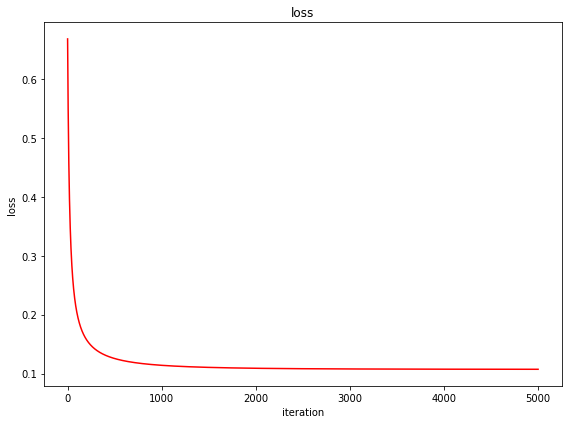

In [10]:
def plot_loss_curve(*args):

    plt.figure(figsize=(8,6))   
    plt.title('loss')


    plt.plot(list(range(0,len(loss_iteration))), loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')

    plt.tight_layout()
    plt.show()
    
plot_loss_curve(loss_iteration)

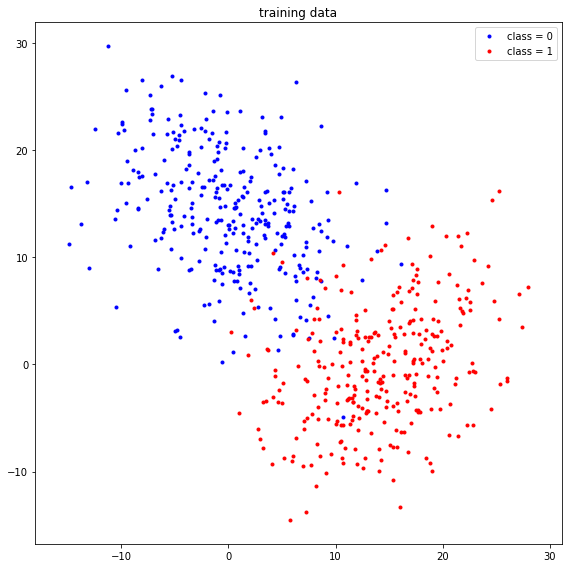

In [11]:
def plot_data(point_x, point_y, label):
    
    plt.figure(figsize=(8,8))
    plt.title('training data')
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")

    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_data(point_x, point_y, label)

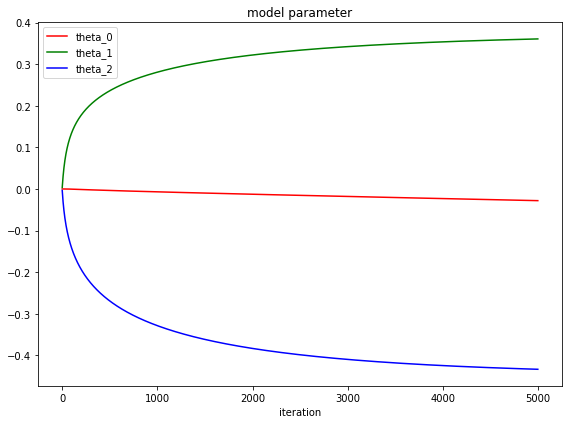

In [12]:
def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')

    n = theta_iteration.shape[0]
    r = np.zeros(n)
    g = np.zeros(n)
    b = np.zeros(n)
    
    for i in range(0,n):
        r[i] = theta_iteration[i][0]
        g[i] = theta_iteration[i][1]
        b[i] = theta_iteration[i][2]
        
    plt.plot(list(range(0,n)), r, '-', color = 'red' , label = "theta_0")
    plt.plot(list(range(0,n)), g, '-', color = 'green', label = "theta_1")
    plt.plot(list(range(0,n)), b, '-', color = 'blue', label = "theta_2")
    
    plt.xlabel('iteration')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
plot_model_parameter(theta_iteration)

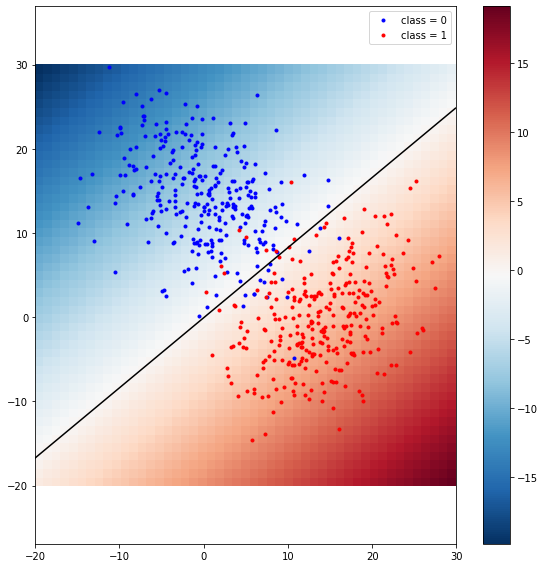

In [13]:
def plot_classifier(point_x, point_y, label, theta):

    plt.figure(figsize=(8,8))
    
    x = np.linspace(-20, 30) 
    y = np.linspace(-20, 30)
    X,Y = np.meshgrid(x,y)
    Z = theta[0] + theta[1]*X + theta[2]*Y
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu_r'))
    plt.colorbar()
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")
    
    line_x = np.arange(-20, 30, 0.1)
    line_y = -1*(1/theta[2])*(theta[0] + theta[1]*line_x)
    plt.plot(line_x, line_y, '-', color = 'black')
    
    
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_classifier(point_x, point_y, label, theta)

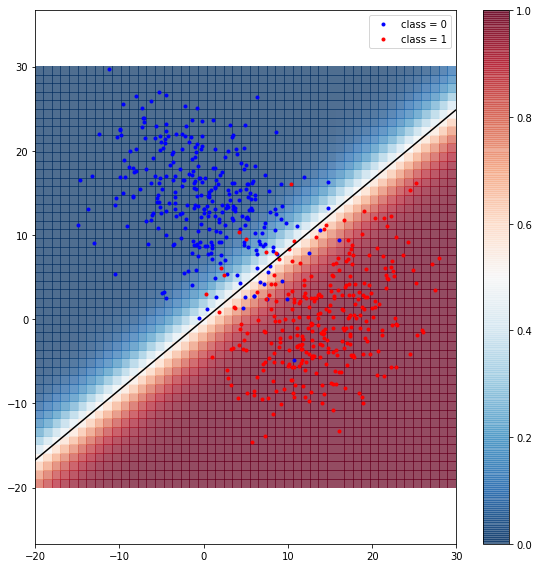

In [14]:
def plot_classifier2(point_x, point_y, label, theta):

    plt.figure(figsize=(8,8))
    
    x = np.linspace(-20, 30, 50) 
    y = np.linspace(-20, 30, 50)
    X,Y = np.meshgrid(x,y)
    Z = sigmoid(theta[0] + theta[1]*X + theta[2]*Y)
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.get_cmap('RdBu_r'), alpha=0.7, vmin=0, vmax=1)
    plt.colorbar()
    
    red_x = []
    red_y = []
    blue_x = []
    blue_y = []
    for i in range(point_x.shape[0]):
        if(label[i] == 0):
            blue_x.append(point_x[i])
            blue_y.append(point_y[i])
        else:
            red_x.append(point_x[i])
            red_y.append(point_y[i])
    
    plt.plot(blue_x, blue_y, '.', color = 'blue', label = "class = 0")
    plt.plot(red_x, red_y, '.', color = 'red', label = "class = 1")
    
    line_x = np.arange(-20, 30, 0.1)
    line_y = -1*(1/theta[2])*(theta[0] + theta[1]*line_x)
    plt.plot(line_x, line_y, '-', color = 'black')
    
    
    
    plt.axis('equal')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_classifier2(point_x, point_y, label, theta)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data point in blue for class 0 and in red for class 1

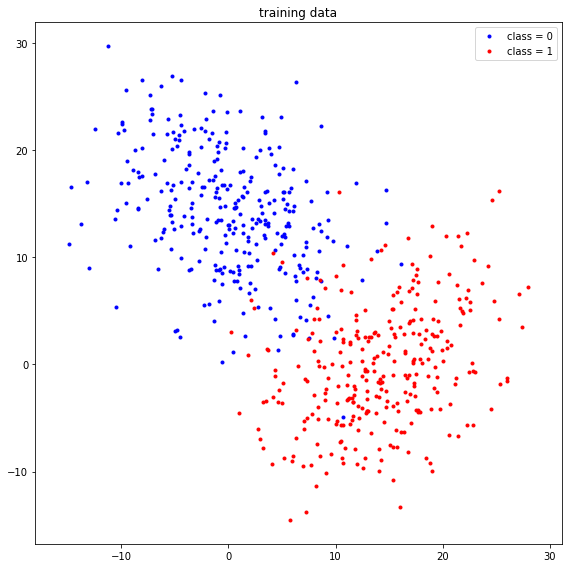

In [15]:
plot_data(point_x, point_y, label)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

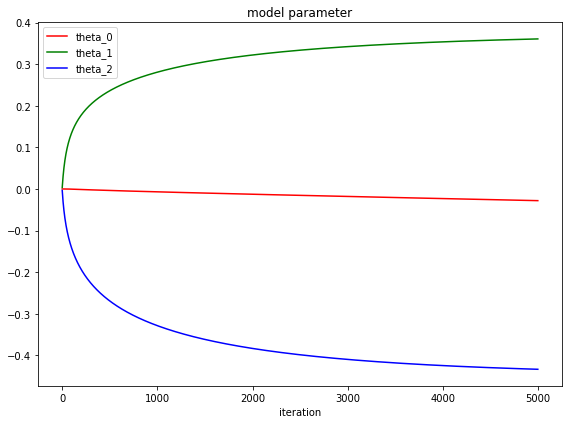

In [16]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

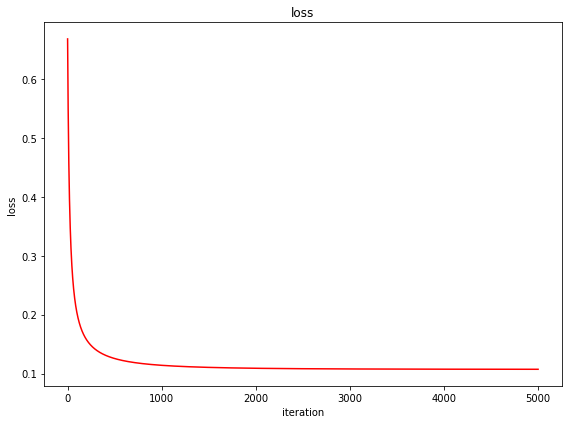

In [17]:
plot_loss_curve(loss_iteration)

### # 04. plot the classifier with the given data points superimposed

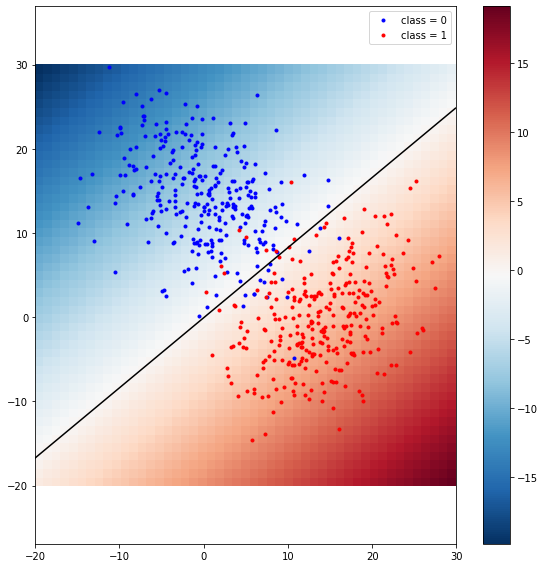

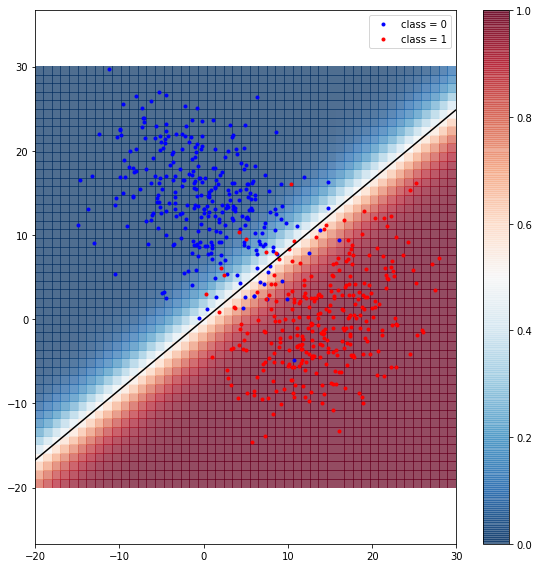

In [18]:
#with linear regression
plot_classifier(point_x, point_y, label, theta)
#with logistic regression (sigmoid)
plot_classifier2(point_x, point_y, label, theta)